In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import neattext.functions as nfx

In [2]:
politics = pd.read_csv('politics.csv')
cultur = pd.read_csv('cultur.csv')
economy = pd.read_csv('economy.csv')
eduction = pd.read_csv('education.csv')
sport = pd.read_csv('sport.csv')

In [3]:
df = pd.concat([politics,cultur,economy,eduction,sport])

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
df.head()

,Text,Title
0,حسین امیر عبداللهیان وزیر امور خارجه ایران در...,politics
1,محمد باقر قالیباف رئیس مجلس شورای اسلامی در ت...,politics
2,حسین امیرعبداللهیان وزیر امور خارجه ایران در ...,politics
3,وزیر امور خارجه کویت در تماس تلفنی، انتخاب حس...,politics
4,حجت الاسلام و المسلمین سید محمود علوی وزیر پی...,politics


In [6]:
df

,Text,Title
0,حسین امیر عبداللهیان وزیر امور خارجه ایران در...,politics
1,محمد باقر قالیباف رئیس مجلس شورای اسلامی در ت...,politics
2,حسین امیرعبداللهیان وزیر امور خارجه ایران در ...,politics
3,وزیر امور خارجه کویت در تماس تلفنی، انتخاب حس...,politics
4,حجت الاسلام و المسلمین سید محمود علوی وزیر پی...,politics
...,...,...
5981,۱۲ تکواندوکار به اردوی تیم امید جهت حضور در ب...,sport
5982,«ماریجا میسکوویچ» مربی کروات جودو برای برگزار...,sport
5983,سخنگوی فدراسیون فوتبال تأکید کرد هیئت رئیسه ت...,sport
5984,تیم رفتنیگ ایران در مسابقه RX کاپ اروپا به آب...,sport


In [7]:
df['Title'].value_counts()

sport        5986
politics     5922
education    5922
economy      5909
cultur       5877
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

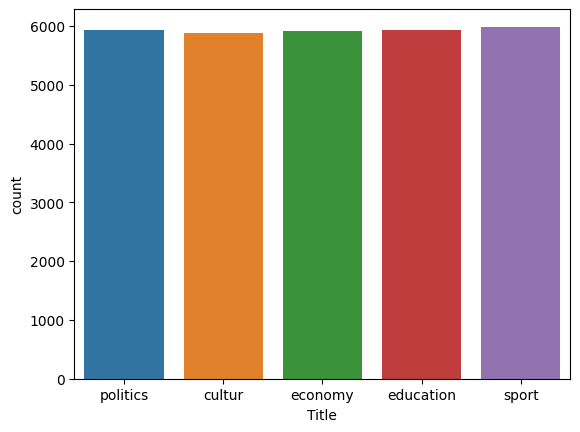

In [8]:
# Plot
sns.countplot(x='Title',data=df)

In [9]:
Xfeatures = df['Text']
ylabels = df['Title']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [11]:
from sklearn.pipeline import Pipeline

In [12]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [13]:
pipe_lr.fit(x_train,y_train)

c:\users\pc-11\pycharmprojects\irna\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [14]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [15]:
pipe_lr.score(x_test,y_test)

0.8413055711873945

In [16]:
ex1 = "تخریب حرم شاهچراغ توسط تروریست ها"

In [18]:
pipe_lr.predict([ex1])

array(['politics'], dtype=object)

In [19]:
pipe_lr.classes_

array(['cultur', 'economy', 'education', 'politics', 'sport'],
      dtype=object)

In [20]:
pipe_lr.predict_proba([ex1])

array([[0.22432538, 0.09620392, 0.08006477, 0.43834794, 0.16105798]])